In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
a=pd.read_csv("C:\\Users\Ogeid99\Desktop\DS\excel\catalogo_l'aquila.txt",sep='|')
#put the index in ascending way
a.sort_values(by='Time',ascending=False,inplace=True) #sort values according to time
num=pd.Series([i for i in reversed(range(0,int(a.size/len(a.columns))))])  #range(0,2,-1) gives [2,1], riversed gives [1,0]
a=pd.concat([a,num],axis=1)
a.set_index(0,inplace=True) #remember inplace
a=a.iloc[::-1] #invert the order
a

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,,,,,,,,,,,,,
0,2133879,2009-11-21T21:34:34.820000,42.299,13.555,8.1,BULLETIN-SISPICK,NaN,NaN,NaN,Md,1.6,--,1 km NW San Demetrio ne' Vestini (AQ)
1,2133719,2009-11-21T08:34:39.570000,42.471,13.356,16.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.4,--,6 km NE Pizzoli (AQ)
2,2133549,2009-11-20T22:45:50.530000,42.486,13.362,10.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km SE Capitignano (AQ)
3,2132999,2009-11-19T16:21:54.780000,42.410,13.376,10.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,7 km N L'Aquila (AQ)
4,2132989,2009-11-19T16:20:21.220000,42.417,13.387,8.7,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,7 km N L'Aquila (AQ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,1868339,2008-12-14T08:16:54.180000,42.356,13.467,9.3,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km E L'Aquila (AQ)
9115,1868139,2008-12-12T18:58:51.600000,42.204,13.387,5.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.9,--,9 km W Rocca di Cambio (AQ)
9116,1863429,2008-11-10T01:56:14.140000,42.409,13.539,9.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,10 km N Poggio Picenze (AQ)


In [4]:
from datetime import datetime
import time
from math import sin, cos, sqrt, atan2, radians, pow
d=1.6   #it could change... try different values
b=1.5
a_time=pd.Series(a['Time'])
a['Time']=a['Time'].to_datetime()
space_time_total=[]
start_time=time.time()
def funct_lat_long(i,j):
    #timei=a_time.iloc[i+j]
    dtime=((timej-a_time.iloc[i+j])).total_seconds()
    lati = radians(a.iloc[i+j]['Latitude'])
    loni = radians(a.iloc[i+j]['Longitude'])
    a2 = sin((lati-latj) / 2)**2 + cos(latj) * cos(lati) * sin((loni-lonj) / 2)**2
    distance = R * (sqrt((2 * atan2(sqrt(a2), sqrt(1 - a2)))**2+(a.iloc[i+j]['Depth/Km']-a.iloc[j]['Depth/Km'])**2))
    space_time=round(dtime*distance**d*pow(10,-b*float(a.iloc[i+j]['Magnitude'])),12)
    values.append(space_time)
    return values, space_time, distance
#a.size: size of data frame, a.columns: size of the columns
#access the first (only) row as a Series using iloc, and then the value using the column name
R = 6373.0    # approximate radius of earth in km
for j in range(int(a.size/len(a.columns))-9000):  
    timej=a_time.iloc[j]  
    latj = radians(a.iloc[j]['Latitude'])
    lonj = radians(a.iloc[j]['Longitude'])
    i=1
    values=[]
    while i+j <= int(a.size/len(a.columns))-8999 : 
        funct_lat_long(i,j)
        i+=1
    min_value=min(values)    
    i_value=values.index(min_value)+1+j
    space_time_total.append([min_value,i_value,j])
end_time=time.time()
total_time=end_time-start_time
print(space_time_total,total_time)

        

AttributeError: 'Series' object has no attribute 'to_datetime'

In [143]:
list_dtm=[]
for elem in space_time_total:
    def funct_lat_long2(i,j):
        #timei=a_time.iloc[i+j]
        timej=a_time.iloc[j]  
        magnitude=a.iloc[i+j]['Magnitude']
        latj = radians(a.iloc[j]['Latitude'])
        lonj = radians(a.iloc[j]['Longitude'])
        dtime=((timej-a_time.iloc[i+j])).total_seconds()
        lati = radians(a.iloc[i+j]['Latitude'])
        loni = radians(a.iloc[i+j]['Longitude'])
        a2 = sin((lati-latj) / 2)**2 + cos(latj) * cos(lati) * sin((loni-lonj) / 2)**2
        distance = R * (sqrt((2 * atan2(sqrt(a2), sqrt(1 - a2)))**2+(a.iloc[i+j]['Depth/Km']-a.iloc[j]['Depth/Km'])**2))
        #space_time=round(dtime*distance**d*pow(10,-b*float(a.iloc[i+j]['Magnitude'])),12)
        #values.append(space_time)
        list_dtm.append( [distance,dtime,magnitude])
    j=elem[2]
    i=elem[1]-elem[2]
    funct_lat_long2(i,j)
list_dtm

[[8.900605395369032, 3185852.68, 1.8],
 [3.0188583125632644, 4773122.34, 1.7],
 [24.898679469914253, 112319.14, 1.4],
 [0.23713511389954492, 3270425.9, 2.3],
 [5.586986665981383, 256660.65, 1.4],
 [3.6398208703124464, 5957069.13, 1.5],
 [2.710915219513792, 4481036.16, 2.5],
 [11.12572152480284, 6853356.73, 3.1],
 [24.432316291858708, 4897060.79, 3.0],
 [5098.4001129518265, 4702058.05, 3.9],
 [5.466265439654528, 1701329.28, 1.6],
 [9.484696792693605, 3090625.03, 2.3],
 [1.7796773316738919, 6252712.72, 1.6],
 [2.5841227816079715, 4306607.77, 2.3],
 [0.9366613915667985, 2104807.94, 1.4],
 [3.6940289496238345, 1402939.02, 1.7],
 [2.5596091460726877, 382344.22, 1.6],
 [7.27405429686272, 384004.72, 2.2],
 [6.225849308284389, 5696713.35, 1.8],
 [10196.800594782242, 335847.83, 3.0],
 [1.7815724093086924, 234890.6, 1.7],
 [0.8454175989543441, 1130047.52, 1.6],
 [6.68279902443636, 373642.24, 1.6],
 [12.858987172017885, 4440862.03, 3.0],
 [0.16412459583131667, 6006640.37, 2.1],
 [6.21638553150187

In [235]:
list_TR=[]
for element in list_dtm:
    T=element[1]*pow(10,-b*float((element[2])/2))
    R=element[0]**d*pow(10,-b*float((element[2])/2))
    list_TR.append([T,R])
list_TR

[[142306.81191661724, 1.4759487430731695],
 [253397.6400717415, 0.3109913921294627],
 [10010.453889537555, 15.271514295461422],
 [61603.34768778863, 0.0018836204090274709],
 [22874.904509451702, 1.3979261074742273],
 [446717.164518013, 0.5925541135589163],
 [59755.577576588425, 0.0657635876003612],
 [32426.743649116335, 0.2234215686387426],
 [27538.196541862977, 0.9348532176162124],
 [5588.406465963166, 1016.0013011931637],
 [107346.62045951988, 0.955663825882304],
 [58216.53023713889, 0.6890290350048293],
 [394519.50136087247, 0.15868871008796281],
 [81121.37804750202, 0.08604012480951931],
 [187591.2051116357, 0.08026610537858067],
 [74479.85019226676, 0.42953689300350567],
 [24124.28937285507, 0.28384277582675727],
 [8596.794839740161, 0.5356023349017538],
 [254462.8382632346, 0.8331395810509468],
 [1888.611137845031, 14572.775764849444],
 [12469.976563608343, 0.13374746683050745],
 [71301.17823556278, 0.048229643837209554],
 [23575.231553603095, 1.3180547205407964],
 [24972.8023893

In [236]:
tr_df=pd.DataFrame(list_TR)
tr_df.columns=['T','R'] #give names to the columns
tr_df

,T,R
0,142306.811917,1.475949
1,253397.640072,0.310991
2,10010.453890,15.271514
3,61603.347688,0.001884
4,22874.904509,1.397926
...,...,...
114,3383.794865,478.981481
115,11952.495137,0.002797
116,41846.608749,0.046299
117,7280.939960,1.543178


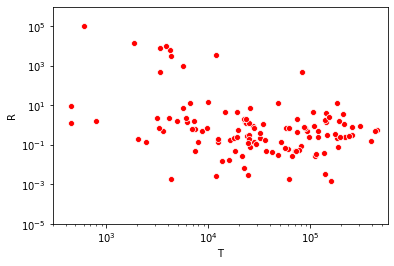

In [261]:
#number of events are represented by shades of red

abc=sns.scatterplot("T","R", data=tr_df,  color='r')
abc.set_xscale('log')
abc.set_yscale('log')
plt.ylim((0.00001, 1000000))
plt.xlim((300, 570000))
abc.set_xscale('log')
abc.set_yscale('log')


plt.show()

In [60]:
#RESET SPACE_TIME_TOTAL!!
space_time_total=[[210037.5601790812, 160, 0], [78804.48484823141, 235, 1], [152874.78967813015, 5, 2], [116.037322969134, 169, 3], [31977.42621974246, 14, 4], [264704.09343252383, 322, 5], [3929.741160568152, 226, 6], [7244.833931931958, 403, 7], [25744.17164450826, 257, 8], [5677828.241014865, 251, 9], [102587.28200388036, 110, 10], [40112.87965062528, 169, 11], [62605.79077550313, 362, 12], [6979.693491927273, 228, 13], [15057.21543758549, 129, 14], [31991.843442952817, 100, 15], [6847.505260439123, 33, 16], [4604.463388836179, 34, 17], [212003.06246366614, 326, 18], [27522306.618812796, 39, 19], [1667.827776818412, 38, 20], [3438.83043147459, 98, 21], [31073.445237068885, 45, 22], [8359.842618064635, 257, 23], [235.998640953304, 375, 24], [8270.46102162652, 31, 25], [89078.80547648937, 32, 26], [38571.695070432426, 161, 27], [262.029560100823, 108, 28], [1519.05391892634, 102, 29], [44819.41004117688, 65, 30], [68450.805748017, 47, 31], [4086.357011062517, 60, 32], [2984.024408663673, 112, 33], [63480.763098773656, 281, 34], [3446.756105359809, 403, 35], [53635.66427788399, 298, 36], [1823.321448978456, 44, 37], [4965.918159991083, 74, 38], [40400.13127337542, 99, 39], [4827.861779640226, 61, 40], [45176.7375664821, 386, 41], [3996.315763943531, 81, 42], [2986.901747781388, 382, 43], [7097.204268853356, 216, 44], [65002.37311388488, 215, 45], [44249.128851057656, 217, 46], [12951.259049079677, 70, 47], [916.000189995013, 218, 48], [62925.45151672849, 377, 49], [197770.2335191195, 89, 50], [9797.070534068866, 56, 51], [20712.6336434913, 403, 52], [604942.6442129153, 250, 53], [4217.917641681254, 162, 54], [5419.2927214882, 210, 55], [33080.117479082255, 131, 56], [144.083834781996, 201, 57], [384.410752695236, 68, 58], [245696.4150281954, 207, 59], [44786.87401929767, 228, 60], [1120.027295720364, 108, 61], [8.04081587893, 75, 62], [70407341.44203702, 64, 63], [244925.76142689, 303, 64], [11076.890250968234, 135, 65], [41937492.07558508, 95, 66], [13145283.390556777, 251, 67], [6926.4551620272, 74, 68], [604789.65982259, 107, 69], [28341847.5587533, 251, 70], [1982.822282504275, 126, 71], [62670.440894118554, 262, 72], [570.003066537376, 77, 73], [386.996225561376, 78, 74], [1814.355489129777, 153, 75], [468000.7811626922, 214, 76], [620.571697465054, 152, 77], [9064.424895975815, 108, 78], [1926.428479431983, 295, 79], [212842.92551712264, 419, 80], [6683.569236213905, 169, 81], [776866.2454980306, 326, 82], [40203775.25253137, 377, 83], [4233.200180858186, 112, 84], [4386.593082595805, 86, 85], [66549720.66051978, 87, 86], [1338.377007498381, 88, 87], [144805.49709153856, 163, 88], [361.16268258965, 92, 89], [13164.11019940819, 112, 90], [4597.529927939579, 152, 91], [7347.262413963842, 98, 92], [24641.71181395639, 382, 93], [491.418105451536, 194, 94], [38177249.45826492, 251, 95], [308090.67923682, 215, 96], [69651.26288482704, 252, 97], [30914.48051225124, 188, 98], [266864.88586491847, 369, 99], [49605.76081742471, 113, 100], [2559.59515164159, 135, 101], [3987.46581507058, 185, 102], [71.408117309281, 403, 103], [384382.62108566455, 315, 104], [3080.355248692839, 403, 105], [211.284460505511, 218, 106], [47544.001784487205, 342, 107], [3766.0280071865, 352, 108], [2472742.6104867966, 197, 109], [2323.462008789531, 111, 110], [87815.55443255404, 128, 111], [3787.167385092971, 330, 112], [27014460.485586986, 251, 113], [1620775.0775938379, 251, 114], [33.436652967618, 218, 115], [1937.446843371848, 175, 116], [11235.78396474488, 119, 117], [41227.22410623914, 124, 118]]
index_mainshocks=[]

for numl in space_time_total:
    index_mainshocks.append(numl[1])
ixs=pd.Series(index_mainshocks, name='index')
duplicaterowsixs = ixs.drop_duplicates(keep='first')
duplicaterowsixs

0      160
1      235
2        5
3      169
4       14
      ... 
111    128
112    330
116    175
117    119
118    124
Name: index, Length: 92, dtype: int64

In [83]:
import pandas as pd
import datetime
row=[]
alisa_declustered=pd.Series([],dtype='object')
i=0
for el in duplicaterowsixs:
    row.append(el)
    index=int(duplicaterowsixs.iloc[i])
    index_declust=pd.Series(index,index=[i])
    time_declust=pd.Series(a.iloc[index]['Time'],index=[i])
    magnitude_declust=pd.Series(a.iloc[index]['Magnitude'],index=[i])
    latitude_declust=pd.Series(a.iloc[index]['Latitude'],index=[i])
    longitude_declust=pd.Series(a.iloc[index]['Longitude'],index=[i])
    depth_declust=pd.Series(a.iloc[index]['Depth/Km'],index=[i])
    dataf=pd.concat([index_declust,time_declust,magnitude_declust,latitude_declust,longitude_declust,depth_declust],axis=1)
    alisa_declustered=pd.concat([alisa_declustered,dataf],axis=0)
    i+=1
alisa_declustered=alisa_declustered.rename(columns={0: "Index", 1: "Time", 2: "Magnitude",3: "Latitude", 4: "Longitude", 5: "Depth/Km"})
time_column=alisa_declustered["Time"]#.astype('str')
time_column=time_column.sort_values()
#time_plot=[zz.split('T') for zz in time_column]
#time_plot=pd.Series([ datetime.datetime.strptime(z, '%Y-%m-%d') for z,w in time_plot])
#time_plot=time_plot.sort_values()

#time_plot=pd.to_datetime(time_plot)
#time_plot=[  h.date() for h in time_plot]
#time_column.astype(np.datatime64)
#a['Time'].astype(np.datatime64)
alisa_declustered

,Index,Time,Magnitude,Latitude,Longitude,Depth/Km
0,160,2009-10-16 00:37:02.140,1.8,42.277,13.451,8.1
1,235,2009-09-27 02:42:37.230,1.7,42.459,13.323,16.1
2,5,2009-11-19 15:33:51.390,1.4,42.278,13.474,10.8
3,169,2009-10-12 19:54:48.880,2.3,42.408,13.377,10.0
4,14,2009-11-16 17:02:40.570,1.4,42.392,13.328,8.7
...,...,...,...,...,...,...
87,128,2009-10-23 19:06:05.750,1.8,42.353,13.420,8.6
88,330,2009-09-10 00:49:18.140,2.5,42.255,13.513,10.0
89,175,2009-10-11 07:54:08.460,2.0,42.314,13.410,10.0
90,119,2009-10-25 12:25:09.390,1.4,42.266,13.506,7.6


In [140]:
#sns.distplot(time_plot,kde=False)
from datetime import datetime
#time_plot=[datetime(x) for x in time_plot]
a['Time']=pd.to_datetime(a['Time'])
diff_time=[ (a.iloc[k]['Time']-a.iloc[len(a['Time'])-1]['Time']).total_seconds() for k in alisa_declustered['Index']]
'''fig, ax = plt.subplots(figsize = (10,6))    
fig = sns.distplot(time_plot)#,ax=ax)
#plt.xticks(np.arange(min(time_plot), max(time_plot)+1, 2.0))
#dates =plt.dates.date2num(time_plot)
ax.set_xticklabels(labels=time_plot)
#new_plot_time=time_plot.drop_duplicates(keep='first')
ax.set_xticklabels(['2009-08-29',
 '2009-08-31',
 '2009-09-02',
 '2009-09-04',
 '2009-09-05',
 '2009-09-06',
 '2009-09-07',
 '2009-09-09'])'''
diff_time

[31702511.29,
 30068446.38,
 34693920.54,
 31426378.03,
 34440049.72,
 28736851.41,
 30200453.57,
 27776839.39,
 29703415.57,
 29857986.71,
 32856007.29,
 28254393.78,
 30190880.72,
 32335241.78,
 33020797.57,
 33996648.04,
 33985857.89,
 28666974.97,
 33930267.57,
 33941433.48,
 33032650.24,
 33785663.99,
 28131414.87,
 34051984.46,
 34023161.42,
 31674101.45,
 32887743.15,
 32983226.97,
 33454987.67,
 33776584.88,
 33491685.84,
 32773615.8,
 29337893.43,
 29120096.45,
 33806859.35,
 33378886.25,
 33026970.88,
 33481348.85,
 27953658.67,
 33346646.23,
 27977374.14,
 30552295.32,
 30569573.98,
 30528889.71,
 33418564.29,
 30508889.26,
 28110731.75,
 33233721.71,
 33615998.2,
 29858518.04,
 31614772.95,
 30643003.11,
 32278184.84,
 30758047.83,
 33448912.72,
 30664441.33,
 33375504.31,
 33465964.35,
 29062227.76,
 32229284.83,
 33133143.23,
 32893679.86,
 32422167.06,
 29608732.78,
 33360510.64,
 33355920.98,
 31746465.61,
 30570512.13,
 31752423.8,
 29157057.79,
 27632480.82,
 33274065

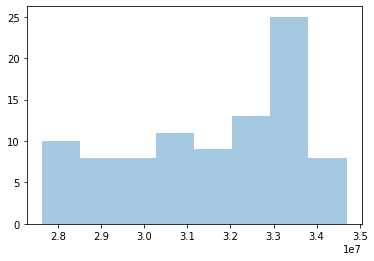

In [141]:

interval=8
number_of_count=len(diff_time)+1
lambda_poisson=number_of_count/interval
sns.distplot(diff_time,kde=False,bins=interval)

In [142]:
lambda_poisson

11.625

In [158]:
minimum=min(diff_time)
maximum=max(diff_time)
diff=maximum-minimum
diff_interval=diff/interval
diff_time=np.array(diff_time)
single_intervals=[]
final_interval_list=[]
for i in range(interval):
    single_intervals.append(minimum+i*diff_interval) 
    if i >=1:
        interval_list=diff_time[(single_intervals[i]>diff_time) & (single_intervals[i-1] <=diff_time)]
        final_interval_list.append(interval_list)
final_interval_list

[array([27776839.39, 28254393.78, 28131414.87, 27953658.67, 27977374.14,
        28110731.75, 27632480.82, 28200675.25, 28509162.83, 28340027.15]),
 array([28736851.41, 28666974.97, 29337893.43, 29120096.45, 29062227.76,
        29157057.79, 28876237.39, 28592847.29]),
 array([30068446.38, 30200453.57, 29703415.57, 29857986.71, 30190880.72,
        29858518.04, 29608732.78, 29849830.15]),
 array([30552295.32, 30569573.98, 30528889.71, 30508889.26, 30643003.11,
        30758047.83, 30664441.33, 30570512.13, 30923431.15, 31133394.98,
        30844849.44]),
 array([31702511.29, 31426378.03, 31674101.45, 31614772.95, 31746465.61,
        31752423.8 , 31603615.63, 31182295.28, 31296737.61]),
 array([32856007.29, 32335241.78, 32887743.15, 32773615.8 , 32278184.84,
        32229284.83, 32893679.86, 32422167.06, 32707752.77, 32803539.74,
        32373854.9 , 32522598.54, 32430087.9 ]),
 array([33020797.57, 33032650.24, 33785663.99, 32983226.97, 33454987.67,
        33776584.88, 33491685.84, 33

In [155]:
REAL_POISSON=[]
for k in final_interval_list:
    REAL_POISSON.append(np.count_nonzero(k))
REAL_POISSON

[10, 8, 8, 11, 9, 13, 25]

In [184]:
from scipy.stats import poisson
random_poisson=poisson.rvs(lambda_poisson,size=interval-1)
random_poisson

array([11, 10,  8, 13,  7,  6, 10])

In [185]:
from scipy.stats import chisquare
chisquare(REAL_POISSON,f_exp=random_poisson)

Power_divergenceResult(statistic=32.03669663669663, pvalue=1.6055412371122914e-05)